# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**           - Naveen Gupta

## **About me**

*Name* : NAVEEN GUPTA

*LinkedIn* : https://www.linkedin.com/in/naveen-gupta-a446a9352?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app

*Git Hub* : https://github.com/ng49-rgb

*Medium* : https://medium.com/@ng251370

# **Project Summary -**

Write the summary here within 500-600 words.


Cardiovascular Risk Prediction – Project Summary
Cardiovascular diseases (CVDs) continue to be one of the leading causes of mortality worldwide. Early detection and risk stratification can play a pivotal role in preventing long-term complications. This project set out to build a machine learning-based system to predict whether a person is at risk for cardiovascular disease, using a variety of clinical and lifestyle features.


Problem Statement
We worked with a structured medical dataset containing anonymized patient records, including variables such as age, gender, blood pressure, cholesterol and glucose levels, body mass index (BMI), smoking and alcohol use, and physical activity status. The main goal was to predict a binary outcome — whether or not the person is at risk of developing cardiovascular disease — in a way that is both accurate and practically deployable.


Model Building and Strategy
The approach to modeling was iterative and comparative. We started by exploring baseline classifiers like Decision Tree and Support Vector Machine (SVM) to understand the underlying patterns in the data. After analyzing their performance and limitations, we moved on to more advanced models, including Random Forest, XGBoost, and Logistic Regression.


Rather than relying on a single model, we combined these three strong performers into a Voting Classifier. By using soft voting, we allowed the final prediction to reflect the averaged probability outputs from each model. This ensemble technique offered a healthy trade-off between model complexity, performance, and generalizability.


We also applied preprocessing steps such as:


- SMOTETomek for handling class imbalance

- Feature scaling to standardize inputs

- Interaction features like age × cholesterol and age × glucose to help models capture nuanced relationships


To reduce overfitting and ensure robust performance, we adopted:

- Cross-validation using Stratified K-Folds

- Hyperparameter tuning

- Custom decision thresholding, moving beyond the default 0.5 to better balance precision and recall

# **Problem Statement**


**Write Problem Statement Here.**

Cardiovascular diseases (CVDs) are a leading cause of mortality worldwide. Early detection is essential for timely intervention and prevention, but manually assessing risk from complex health data can be challenging.

This project aims to develop a machine learning model that accurately predicts the likelihood of cardiovascular disease using structured patient data, including demographic, clinical, and lifestyle variables. After exploring baseline models like Support Vector Machines (SVM) and Decision Trees, we focused on an ensemble Voting Classifier that combines the strengths of Random Forest, XGBoost, and Logistic Regression.

The goal is to create a reliable and generalizable model suitable for real-world applications, such as integration into digital health platforms or decision support tools used by clinicians.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_set/Copy of data_cardiovascular_risk.csv')
data.columns = data.columns.str.lower()

### Dataset First View

In [ ]:
# Dataset First Look
df = data.copy()
df.head()

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
df.shape

(3390, 17)

In [ ]:
# Dataset Rows & Columns count
df.shape[0] #rows

3390

In [ ]:
df.shape[1] # cols

17

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsperday       3368 non-null   float64
 6   bpmeds           3346 non-null   float64
 7   prevalentstroke  3390 non-null   int64  
 8   prevalenthyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totchol          3352 non-null   float64
 11  sysbp            3390 non-null   float64
 12  diabp            3390 non-null   float64
 13  bmi              3376 non-null   float64
 14  heartrate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  tenyearchd       3390 non-null   int64  
dtypes: float64(9),

cols education , cigsPerDay , BPMeds , totChol , BMI , heartRate and glucose might have some null values.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

i.e. No duplicate values are there in any col.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsperday,22
bpmeds,44
prevalentstroke,0
prevalenthyp,0
diabetes,0


Text(0.5, 1.0, 'Missing Values Heatmap')

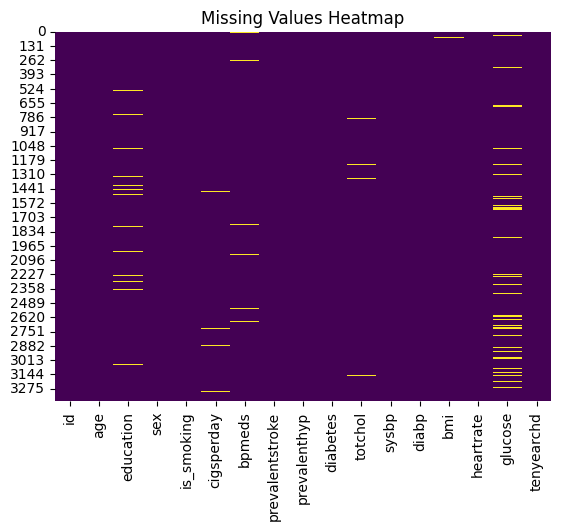

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

### What did you know about your dataset?

Answer Here

There are no duplicate values but we need to deal with some null values in few cols.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

| Variable          | Description                                                                                                                                       |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| `id`              | Unique identifier for each individual                                                                                                             |
| `age`             | Age in years                                                                                                                                      |
| `education`       | Educational level : <br>1 <br>2  <br>3  <br>4|
| `sex`             | Biological sex: `'M'` = Male, `'F'` = Female                                                                                                      |
| `is_smoking`      | Smoking status: `'YES'` = Smoker, `'NO'` = Non-smoker                                                                                             |
| `cigsperday`      | Average number of cigarettes smoked per day                                                                                                       |
| `bpmeds`          | Currently on blood pressure medication (0 = No, 1 = Yes)                                                                                          |
| `prevalentstroke` | History of stroke (0 = No, 1 = Yes)                                                                                                               |
| `prevalenthyp`    | History of hypertension (0 = No, 1 = Yes)                                                                                                         |
| `diabetes`        | Diabetes diagnosis (0 = No, 1 = Yes)                                                                                                              |
| `totchol`         | Total cholesterol level (mg/dL)                                                                                                                   |
| `sysbp`           | Systolic blood pressure (mmHg)                                                                                                                    |
| `diabp`           | Diastolic blood pressure (mmHg)                                                                                                                   |
| `bmi`             | Body Mass Index (weight in kg / height in m²)                                                                                                     |
| `heartrate`       | Resting heart rate (beats per minute)                                                                                                             |
| `glucose`         | Blood glucose level (mg/dL)                                                                                                                       |
| `tenyearchd`      | **Target variable**: Risk of coronary heart disease within 10 years (0 = No, 1 = Yes)                                                             |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsperday,32
bpmeds,2
prevalentstroke,2
prevalenthyp,2
diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsperday       3368 non-null   float64
 6   bpmeds           3346 non-null   float64
 7   prevalentstroke  3390 non-null   int64  
 8   prevalenthyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totchol          3352 non-null   float64
 11  sysbp            3390 non-null   float64
 12  diabp            3390 non-null   float64
 13  bmi              3376 non-null   float64
 14  heartrate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  tenyearchd       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Imputed num cols with median
num_median_cols = ['cigsperday', 'totchol', 'bmi', 'heartrate', 'glucose']
for col in num_median_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Imputed education (Categorical) with Mode
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [ ]:
# Imputed bpmeds (Binary) with 0
df['bpmeds'].fillna(0, inplace=True)

In [ ]:
# Appropriate data type conversion from float to int
df['education'] = df['education'].astype(int)
df['bpmeds'] = df['bpmeds'].astype(int)

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   int64  
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsperday       3390 non-null   float64
 6   bpmeds           3390 non-null   int64  
 7   prevalentstroke  3390 non-null   int64  
 8   prevalenthyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totchol          3390 non-null   float64
 11  sysbp            3390 non-null   float64
 12  diabp            3390 non-null   float64
 13  bmi              3390 non-null   float64
 14  heartrate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  tenyearchd       3390 non-null   int64  
dtypes: float64(7),

### What all manipulations have you done and insights you found?

Answer Here.

Dealt with the missind values and converted 2 cols to appropriate data type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

UNIVARIATE ANALYSIS (Individual Variables)

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
fig = px.histogram(
    df,
    x='tenyearchd',
    color_discrete_sequence=['royalblue'],
    title='Count of TenYearCHD',
    text_auto=True,
    width=700,
    height=400
)

fig.update_layout(bargap=0.2)
fig.show()

##### 1. Why did you pick the specific chart?

Plotly’s histogram allows interactive exploration of how many individuals are at risk (CHD = 1) versus not at risk (CHD = 0). It makes storytelling clearer by showing both counts and hover values. This helps in identifying class imbalance early in the pipeline

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The target variable is dominated by CHD= 0.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

- It highlights a class imbalance, which is important to address during model training (e.g., using SMOTE or class weights).
- Enables targeted preventive strategies for those at risk.

#### Chart - 2 Age Distribution

In [ ]:
# Chart - 2 visualization code
fig = px.histogram(
    df,
    x='age',
    nbins=30,
    color_discrete_sequence=['royalblue'],
    title='Age Distribution',
    text_auto=True,
    width=700,
    height=400
)

fig.update_layout(bargap=0.2)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.
The age histogram helps to understand which age groups are most represented in the dataset and reveals any age-related trends.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The age distribution in the dataset ranges from 32 to 71 years, with a slightly higher number of middle-aged individuals compared to older adults.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Model can be trained well to find patterns for this age group most efficiently.

#### Chart - 3 Sex Distribution

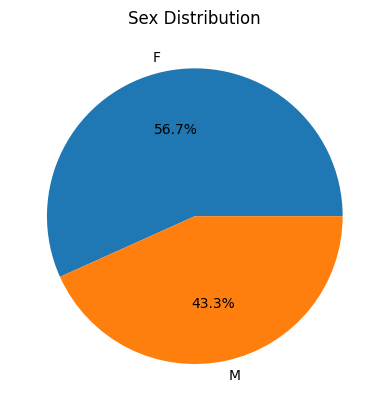

<Figure size 400x200 with 0 Axes>

In [ ]:
# Chart - 3 visualization code
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.figure(figsize=(4,2))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It is easy to visualise categorical data easily using pie charts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Females are more in our dataset as compared to men.

#### Chart - 4 Smoking Status

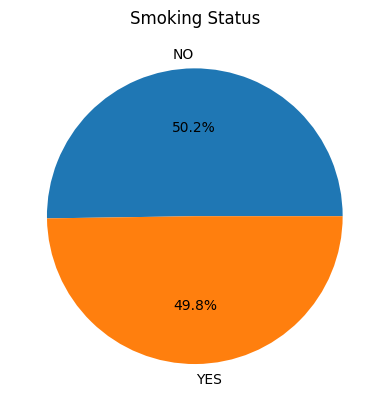

<Figure size 400x200 with 0 Axes>

In [ ]:
# Chart - 4 visualization code
plt.pie(df['is_smoking'].value_counts(), labels=df['is_smoking'].value_counts().index, autopct='%1.1f%%')
plt.title('Smoking Status')
plt.figure(figsize=(4,2))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It is easy to see the difference between two contradicting parameters using pie charts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The no. of smokers and non smokers is almost identical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Not direct influence till yet.

#### Chart - 5 Total Cholestrol Distribution

In [ ]:
# Chart - 5 visualization code
fig = px.histogram(
    df,
    x='totchol',
    nbins=30,
    color_discrete_sequence=['royalblue'],
    title='Total Cholestrol Distribution',
    text_auto=True,
    width=1200,
    height=500
)
fig.update_layout(bargap=0.4)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It is easy to visualize numerical data with this plot.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of the data is in normal cholesterol range.

####**Bivariate Analysis**

#### Chart - 6 CHD Rate By Gender

Text(0.5, 1.0, 'CHD Rate by Gender')

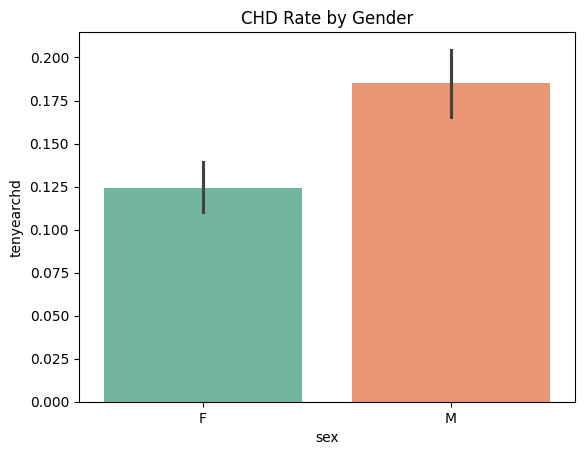

In [ ]:
# Chart - 6 visualization code
sns.barplot(x='sex', y='tenyearchd', data=df , palette= 'Set2')
plt.title("CHD Rate by Gender")

##### 1. Why did you pick the specific chart?

Answer Here.
It clearly shows the result of Bivariate analysis between two different features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Even though the female count was found to be more, the cardiovascular risk is still more in men by a good margin.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The chances of cardiovascular risk is more in men as compared to females.This tells us which audience we need to concentrate more on.

#### Chart - 7 CHD Rate By Smokers

Text(0.5, 1.0, 'CHD Rate by Smokers')

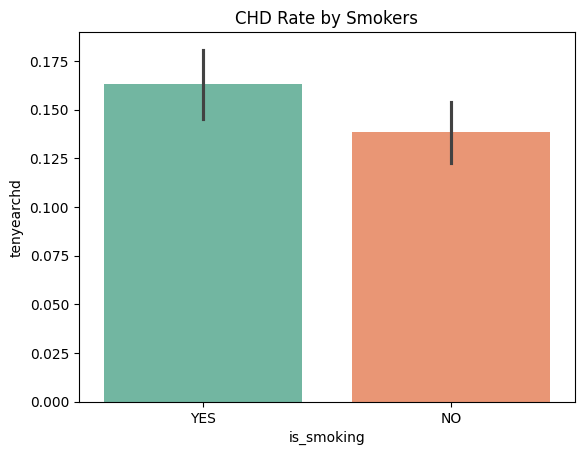

In [ ]:
# Chart - 7 visualization code
sns.barplot(x='is_smoking', y='tenyearchd', data=df , palette= 'Set2')
plt.title("CHD Rate by Smokers")

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Is smoking fellas have more higher tenyearchd ratio than non smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
We can confirm that smoking is harmful and increases a greater risk.

#### Chart - 8 CHD By Education level

Text(0.5, 1.0, 'CHD Rate by Education Level')

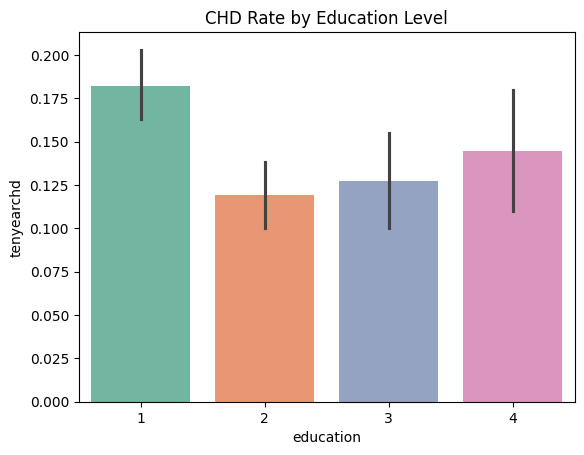

In [ ]:
# Chart - 8 visualization code
sns.barplot(x='education', y='tenyearchd', data=df , palette= 'Set2')
plt.title("CHD Rate by Education Level")

##### 1. Why did you pick the specific chart?

Answer Here.
This barplot helps to visualise all 4 educational levels v/s tenyearchd very clearly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1 and 4 educational levels have higher chd.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes, as it helps to idemtify the group , doctors can study their lifestyles and help them reduce the risk.

#### Chart - 9 Boxplot: Age vs CHD

In [ ]:
# Chart - 9 visualization code
fig = px.box(
    df,
    x='tenyearchd',
    y='age',
    color='tenyearchd',
    title='Age vs CHD',
    width=700,
    height=400
)
fig.update_layout(bargap=0.2)
fig.show()

#### Chart - 10 Boxplot: BMI vs CHD

In [ ]:
# Chart - 10 visualization code
fig = px.box(
    df,
    x='tenyearchd',
    y='bmi',
    color='tenyearchd',
    title='BMI vs CHD',
    width=700,
    height=400
)
fig.update_layout(bargap=0.2)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Box plot helps to identify the lower and upper range easily.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- The spread is wider in the CHD group, which may indicate greater BMI variability among those at risk.
- People who developed CHD within 10 years tend to have a **slightly** higher BMI on average.
- Presence of outliers in both the groups.

#### Chart - 11 Glucose vs CHD

In [ ]:
# Chart - 11 visualization code
fig = px.box(
    df,
    x='tenyearchd',
    y='glucose',
    color='tenyearchd',
    title='Glucose vs CHD',
    width=700,
    height=400
)
fig.update_layout(bargap=0.2)
fig.show()

##### 1. What is/are the insight(s) found from the chart?

Answer Here

- Presence of outliers.
- People who developed CHD within 10 years tend to have a **slightly** higher Glucose level on average.

Multivariate Analysis

#### Chart - 12 CHD Risk by Smoking & Sex

Text(0.5, 1.0, 'CHD Risk by Smoking & Sex')

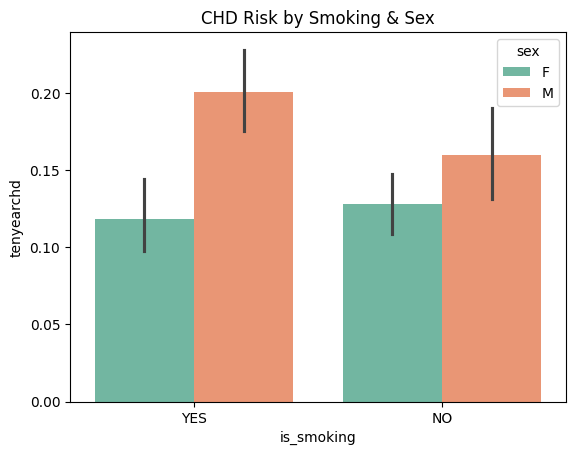

In [ ]:
# Chart - 12 visualization code
sns.barplot(x='is_smoking', y='tenyearchd', hue='sex', data=df , palette= 'Set2')
plt.title("CHD Risk by Smoking & Sex")

##### 1. Why did you pick the specific chart?

Answer Here.
Hue with barplot helps us to identify hidden patterns in Multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Earlier insights are now verified regarding smokers and gender factor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Gender is a bigger criteria than gender.This helps the agency to which audiences are at a greater risk and take the responsive measures.

#### Chart - 13 - Correlation Heatmap

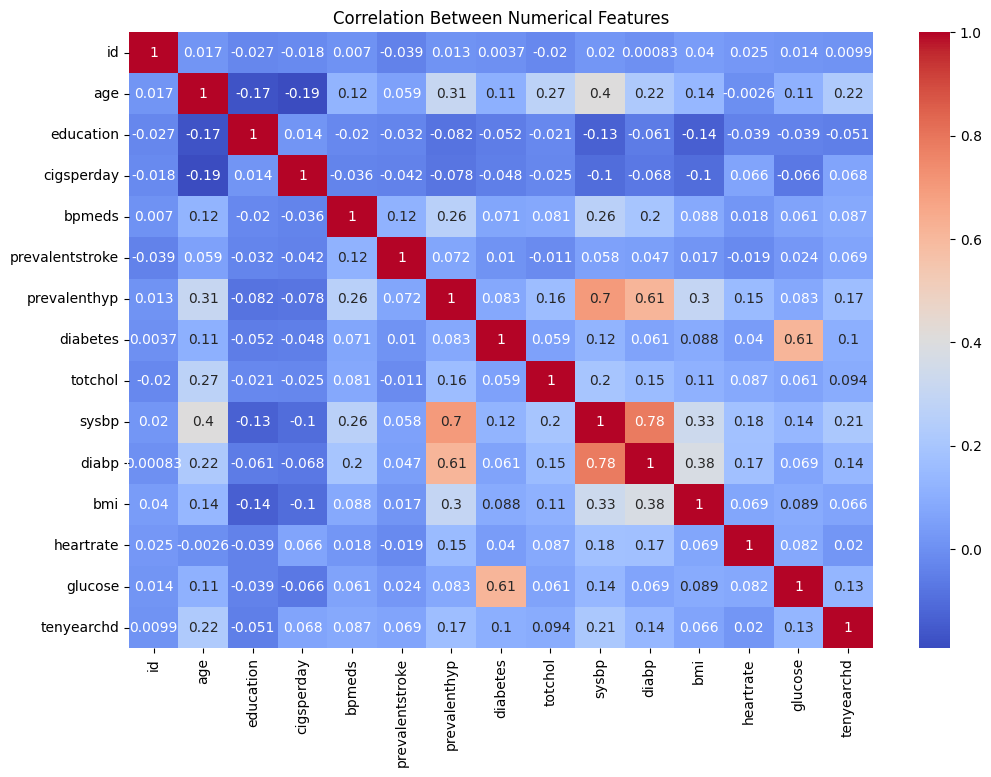

In [ ]:
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

It helps to study the relation between numerical features and identify the important Factors.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Higher systolic blood pressure (sysbp) and diastolic pressure (diabp) show strong correlation (0.78), and both are moderately linked to prevalentHyp (existing hypertension), which in turn impacts cardiovascular risk (tenyearCHD). Meanwhile, education and cigsPerDay show very weak or even negative correlation with CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact (↑ risk):

- ↑ sysbp, diabp, glucose, age → higher CHD risk

- These are biologically plausible and align with known medical risk factors.

Negative impact (↓ risk or less influence):

Weak/negative links from education, cigsPerDay, bpmMeds suggest lower predictive power, possibly due to noise or missing context (like duration/exposure).

#### Chart - 14 - Pair Plot

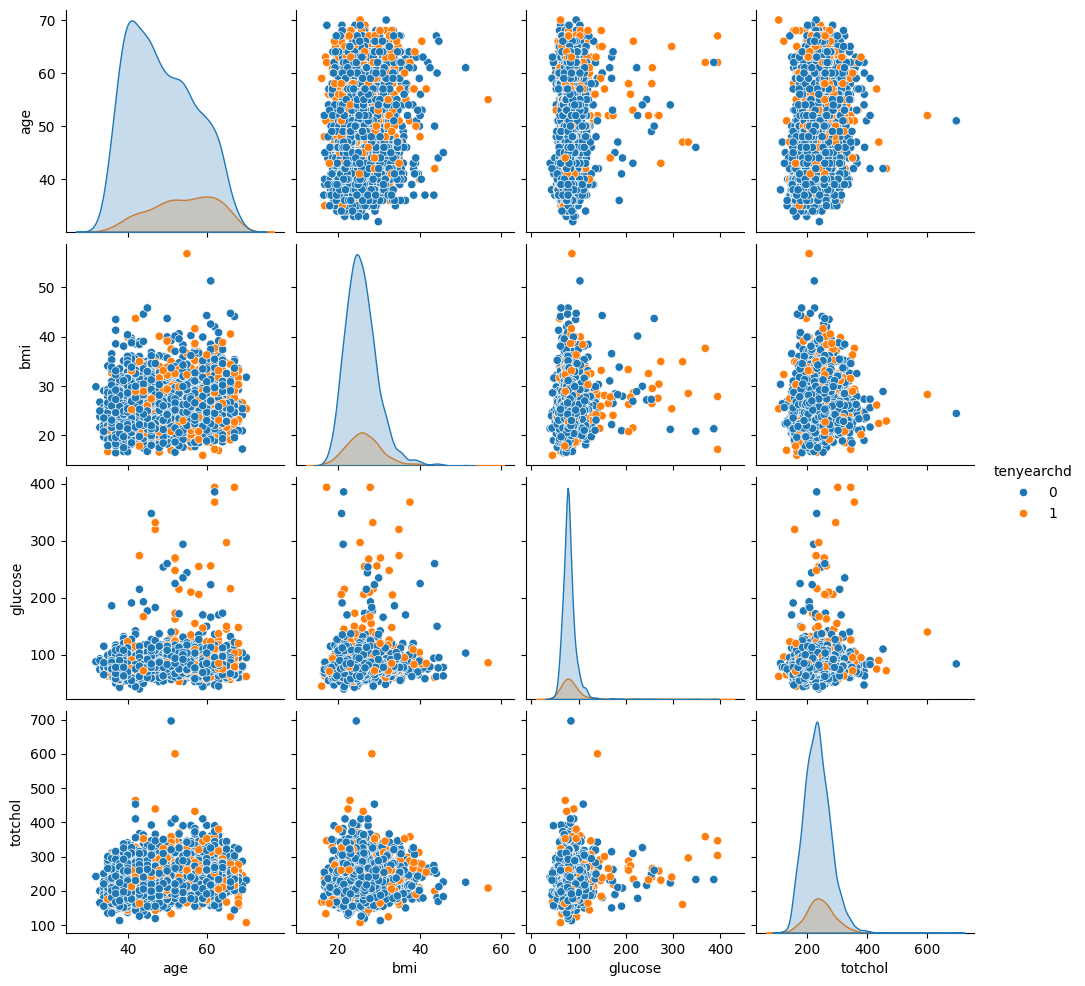

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, vars=['age', 'bmi', 'glucose', 'totchol'], hue='tenyearchd')

##### 1. Why did you pick the specific chart?

Answer Here.

To identify if the pattern is linear or not.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the data is non linear.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().values.any()

np.False_

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

I used a combination of median, mode, and constant-value imputation depending on the data type and distribution of each column.

The goal was to retain data quality while preventing skew or bias from extreme values or unjustified assumptions.

### 2. Handling Outliers

In [ ]:
# # Handling Outliers & Outlier treatments
# # Function to count outliers using IQR
# def detect_outliers_iqr(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     outliers = df[(df[col] < lower) | (df[col] > upper)]
#     return outliers.shape[0]

# # Apply to all numeric columns
# outlier_report = {}
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# for col in numeric_cols:
#     count = detect_outliers_iqr(df, col)
#     if count > 0:
#         outlier_report[col] = count

# # Show columns with outliers and their count
# import pandas as pd
# pd.DataFrame.from_dict(outlier_report, orient='index', columns=['Outlier Count'])


In [ ]:
print(df['tenyearchd'].value_counts())
print(df['diabetes'].value_counts())
print(df['prevalentstroke'].value_counts())

tenyearchd
0    2879
1     511
Name: count, dtype: int64
diabetes
0    3303
1      87
Name: count, dtype: int64
prevalentstroke
0    3368
1      22
Name: count, dtype: int64


In [ ]:
# def cap_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
#     """
#     Caps the outliers in a numeric column using the specified lower and upper percentiles.
#     """
#     lower = df[column].quantile(lower_quantile)
#     upper = df[column].quantile(upper_quantile)
#     df[column] = df[column].clip(lower, upper)
#     return df

# #  Columns to cap (choose relevant continuous features)
# columns_to_cap = ['glucose', 'bmi', 'totchol', 'sysbp', 'diabp', 'heartrate', 'cigsperday']

# # Apply capping
# for col in columns_to_cap:
#     df = cap_outliers(df, col)


In [ ]:
# Check if outliers still exist after capping
# for col in columns_to_cap:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     outliers = df[(df[col] < lower) | (df[col] > upper)]
#     print(f"{col} → Remaining outliers: {outliers.shape[0]}")

In [ ]:
df_original = df.copy()  # backup before capping

In [ ]:
# this>

In [ ]:
# IQR-Based Capping
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Apply to all important numerical columns
columns_to_cap = ['glucose', 'bmi', 'totchol', 'sysbp', 'diabp', 'heartrate', 'cigsperday']
for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

In [ ]:
# columns_to_cap = ['glucose', 'bmi', 'totchol', 'sysbp', 'diabp', 'heartrate', 'cigsperday']

In [ ]:
# strict capping
# def cap_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     df[column] = df[column].clip(lower, upper)
#     return df

# for col in columns_to_cap:
#     df = cap_outliers_iqr(df, col)

In [ ]:
# Check if outliers still exist after capping
# for col in columns_to_cap:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     outliers = df[(df[col] < lower) | (df[col] > upper)]
#     print(f"{col} → Remaining outliers: {outliers.shape[0]}")

In [ ]:
#this >

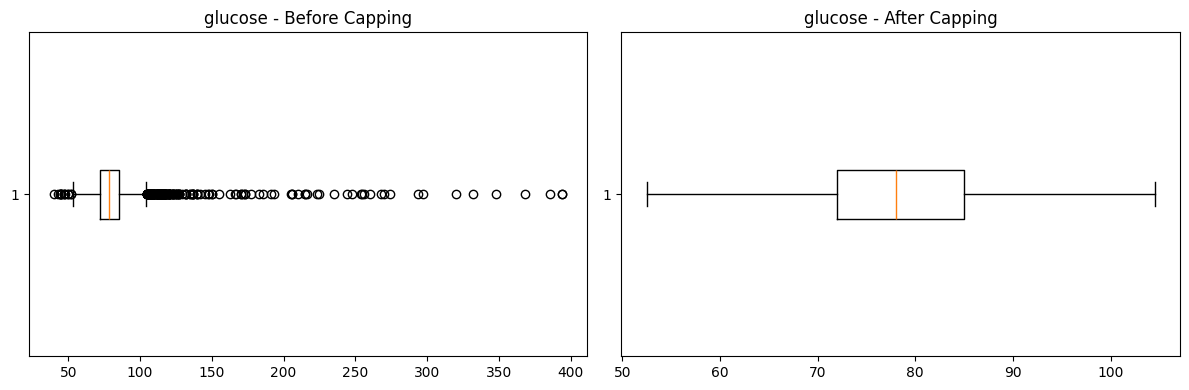

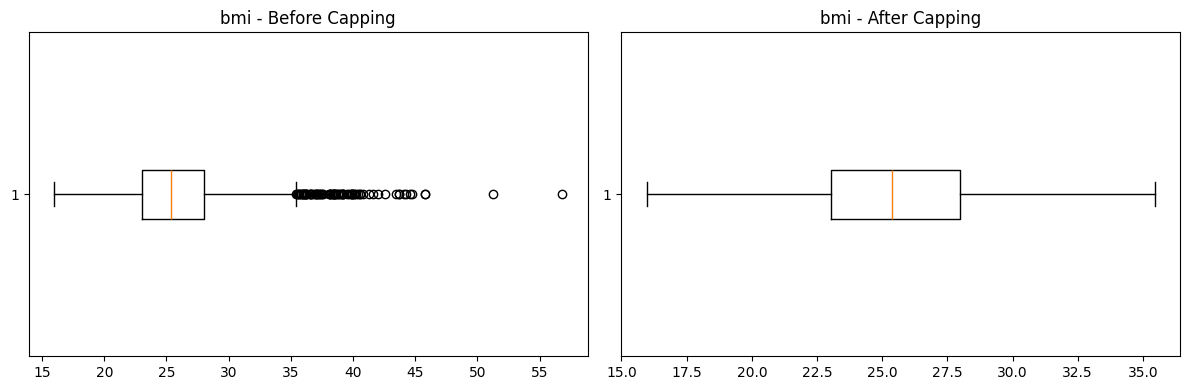

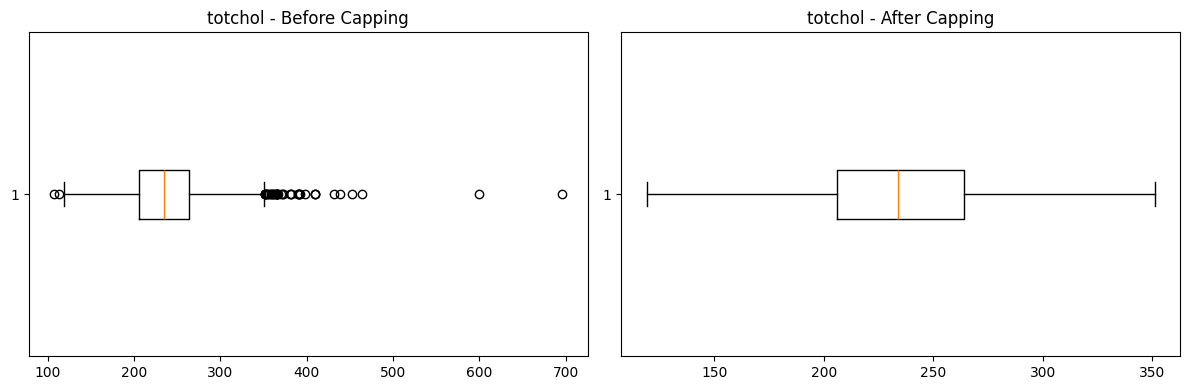

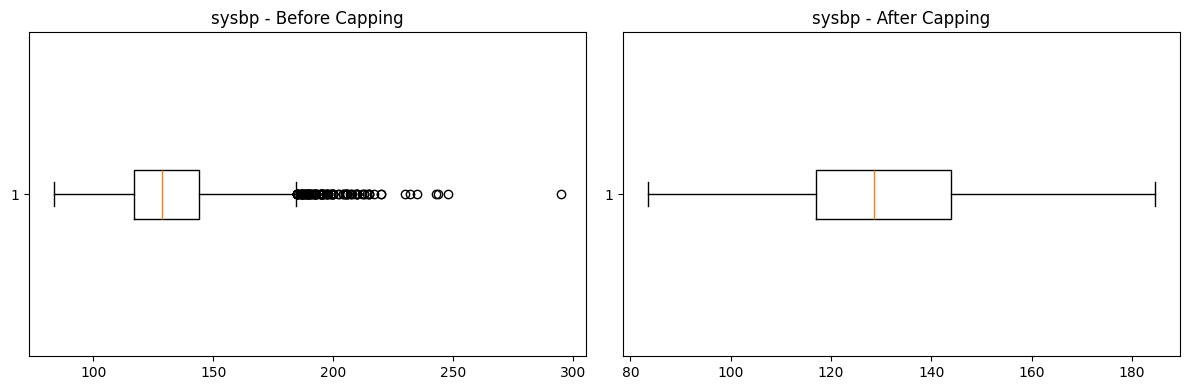

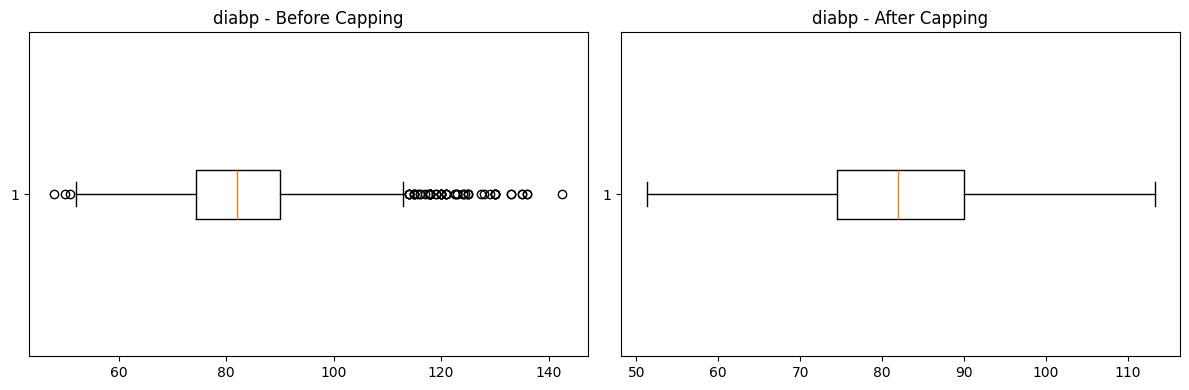

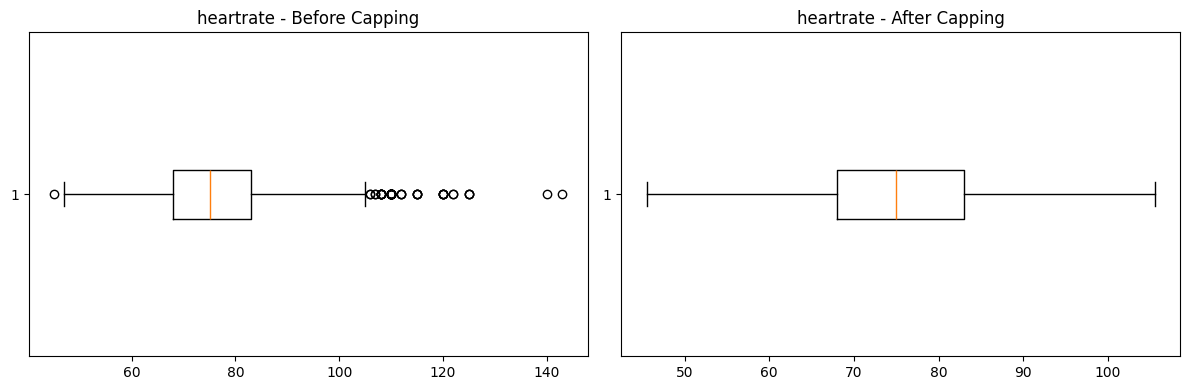

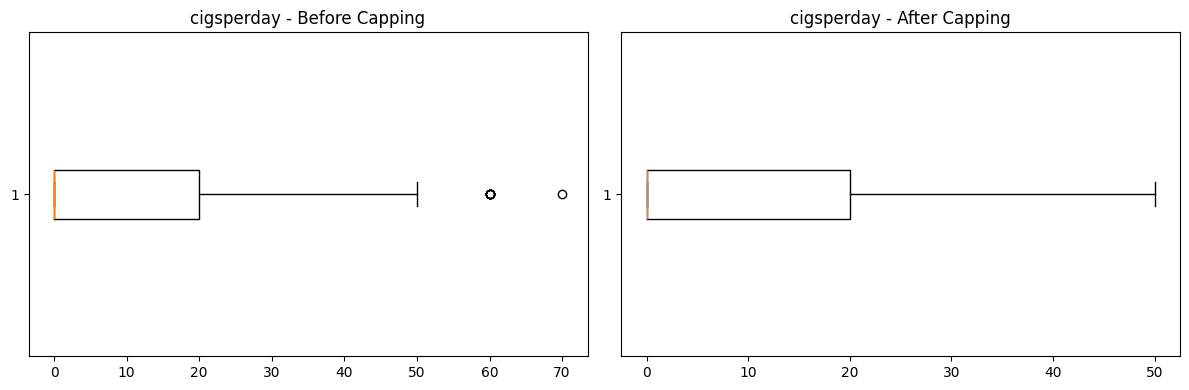

In [ ]:
for col in columns_to_cap:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Before capping
    axes[0].boxplot(df_original[col], vert=False)
    axes[0].set_title(f'{col} - Before Capping')

    # After capping
    axes[1].boxplot(df[col], vert=False)
    axes[1].set_title(f'{col} - After Capping')

    plt.tight_layout()
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
categorical_cols = ['sex', 'is_smoking', 'education']
X = df.drop(columns=['tenyearchd'])  # Features
y = df['tenyearchd']                 # Target

column_transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

# Feature names (optional but useful)
ohe = column_transformer.named_transformers_['ohe']
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
non_cat_cols = [col for col in X.columns if col not in categorical_cols]
final_feature_names = list(encoded_feature_names) + non_cat_cols

X_encoded_df = pd.DataFrame(X_encoded, columns=final_feature_names)

In [ ]:
#print(X_encoded_df.head())

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
X_encoded_df.drop(columns=['id'], inplace=True)

#### 2. Feature Selection

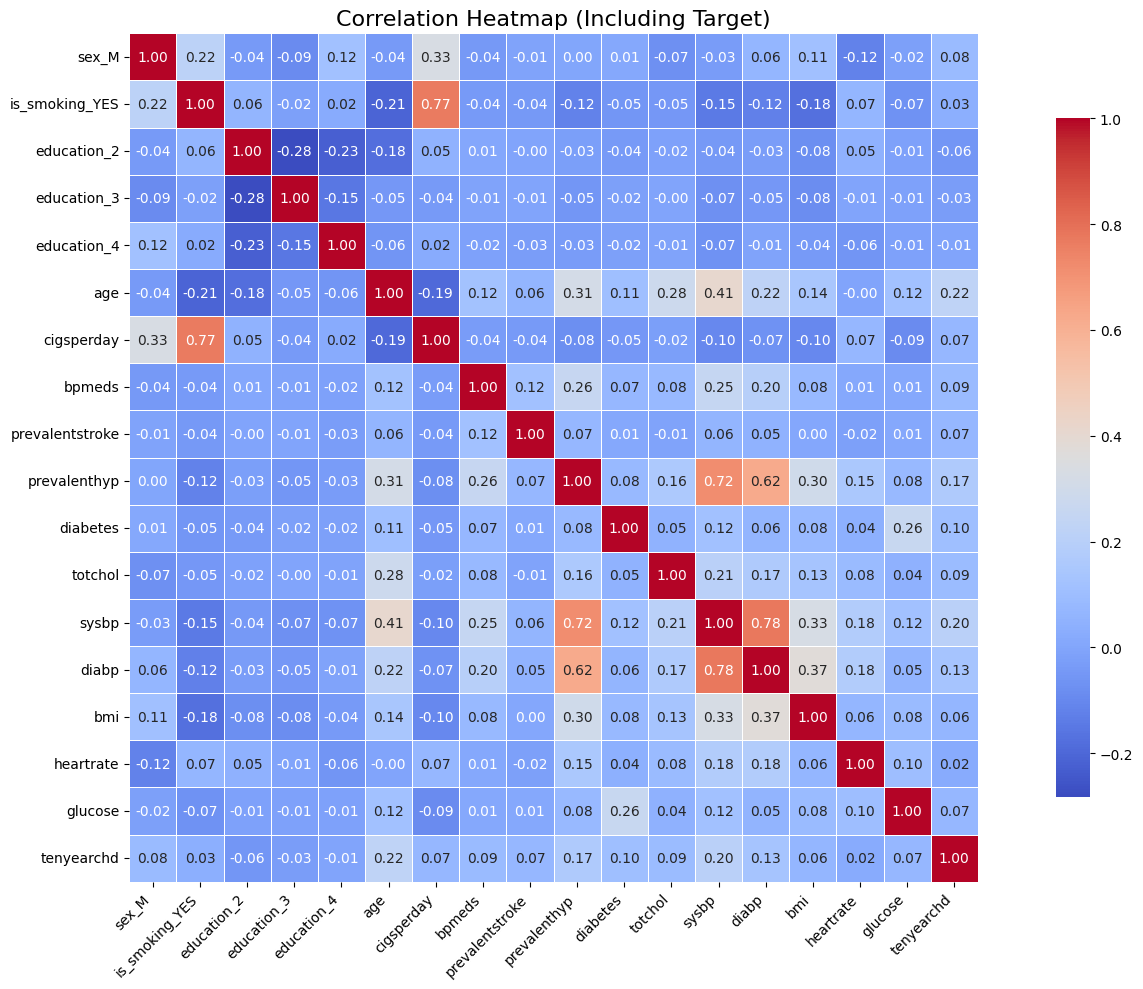

In [ ]:
# Select your features wisely to avoid overfitting
# Combine features with target temporarily
df_corr = X_encoded_df.copy()
df_corr['tenyearchd'] = y

plt.figure(figsize=(16, 10))
corr_matrix = df_corr.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Heatmap (Including Target)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Create pulse pressure feature
X_encoded_df['pulse_pressure'] = X_encoded_df['sysbp'] - X_encoded_df['diabp']


In [ ]:
# Create smoker load (only if is_smoking_YES exists)
X_encoded_df['smoker_load'] = X_encoded_df['is_smoking_YES'] * X_encoded_df['cigsperday']


In [ ]:
# def bmi_category(bmi):
#     if bmi < 18.5:
#         return 'underweight'
#     elif bmi < 25:
#         return 'normal'
#     elif bmi < 30:
#         return 'overweight'
#     else:
#         return 'obese'

# X_encoded_df['bmi_category'] = X_encoded_df['bmi'].apply(bmi_category)


In [ ]:
# Assuming you have a DataFrame called `X` that includes all the features you listed

# Create interaction features with age
X_encoded_df['age_totchol'] = X_encoded_df['age'] * X_encoded_df['totchol']
X_encoded_df['age_glucose'] = X_encoded_df['age'] * X_encoded_df['glucose']
X_encoded_df['age_sysbp'] = X_encoded_df['age'] * X_encoded_df['sysbp']
X_encoded_df['age_diabp'] = X_encoded_df['age'] * X_encoded_df['diabp']
X_encoded_df['age_bmi'] = X_encoded_df['age'] * X_encoded_df['bmi']
X_encoded_df['age_pulse_pressure'] = X_encoded_df['age'] * X_encoded_df['pulse_pressure']
X_encoded_df['age_smoker_load'] = X_encoded_df['age'] * X_encoded_df['smoker_load']

# Drop less important or highly correlated features to avoid overfit
# Example: drop individual components if interaction suffices (optional)
X_encoded_df.drop(['totchol', 'glucose', 'sysbp', 'diabp', 'bmi', 'smoker_load'], axis=1, inplace=True)

# Now you can use `X` in your model


In [ ]:
print(X_encoded_df.head())

   sex_M  is_smoking_YES  education_2  education_3  education_4   age  \
0    0.0             1.0          1.0          0.0          0.0  64.0   
1    1.0             0.0          0.0          0.0          1.0  36.0   
2    0.0             1.0          0.0          0.0          0.0  46.0   
3    1.0             1.0          0.0          0.0          0.0  50.0   
4    0.0             1.0          0.0          0.0          0.0  64.0   

   cigsperday  bpmeds  prevalentstroke  prevalenthyp  diabetes  heartrate  \
0         3.0     0.0              0.0           0.0       0.0       90.0   
1         0.0     0.0              0.0           1.0       0.0       72.0   
2        10.0     0.0              0.0           0.0       0.0       88.0   
3        20.0     0.0              0.0           1.0       0.0       68.0   
4        30.0     0.0              0.0           0.0       0.0       70.0   

   pulse_pressure  age_totchol  age_glucose  age_sysbp  age_diabp  age_bmi  \
0            63.0   

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Reshape to 2D array and fit-transform
# encoder = OneHotEncoder(drop='first', sparse_output=False)
# bmi_encoded = encoder.fit_transform(X_encoded_df[['bmi_category']])

# # Get encoded column names
# bmi_encoded_cols = encoder.get_feature_names_out(['bmi_category'])

# # Convert to DataFrame
# import pandas as pd
# bmi_encoded_df = pd.DataFrame(bmi_encoded, columns=bmi_encoded_cols, index=X_encoded_df.index)

# # Concatenate with main DataFrame
# X_encoded_df = pd.concat([X_encoded_df.drop(columns=['bmi_category']), bmi_encoded_df], axis=1)


##### Which all features you found important and why?

Answer Here.

Age related , blood pressure related features are most critical as their correlation directly influenced the target variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

# 1. Split the raw data FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Scale training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Apply SMOTE+Tomek only on training data
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled, y_train)




In [ ]:
# # Split your data to train and test. Choose Splitting ratio wisely.
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X_encoded_df, y, test_size=0.2, random_state=42, stratify=y
# )

# # Fit only on training data, transform both
# scaler = StandardScaler()
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Example: check balance
# y.value_counts(normalize=True)

In [ ]:
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Apply SMOTE to scaled training data
# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# # Optional: Check new class balance
# print("Before SMOTE:\n", y_train.value_counts())
# print("\nAfter SMOTE:\n", pd.Series(y_train_resampled).value_counts())


In [ ]:
# print(X_train_resampled.head())

In [ ]:
print(y_train_resampled.head())

0    0
1    0
2    1
3    0
4    0
Name: tenyearchd, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

SmoteTomek

We used SMOTETomek to address class imbalance in our dataset, ensuring the model learns equally from both high-risk and low-risk cardiovascular cases — improving recall and reducing bias toward the majority class.

## ***7. ML Model Implementation***

### ML Model - 1


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       576
           1       0.28      0.64      0.39       102

    accuracy                           0.70       678
   macro avg       0.60      0.67      0.60       678
weighted avg       0.82      0.70      0.74       678

Accuracy: 0.700589970501475
Precision: 0.2813852813852814
Recall: 0.6372549019607843
F1 Score: 0.39039039039039036
ROC AUC Score: 0.7101205065359478


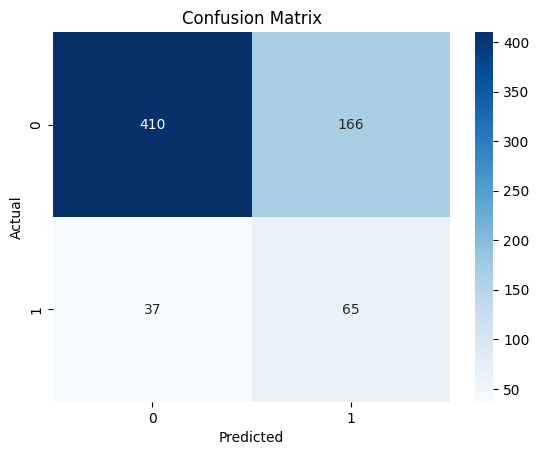

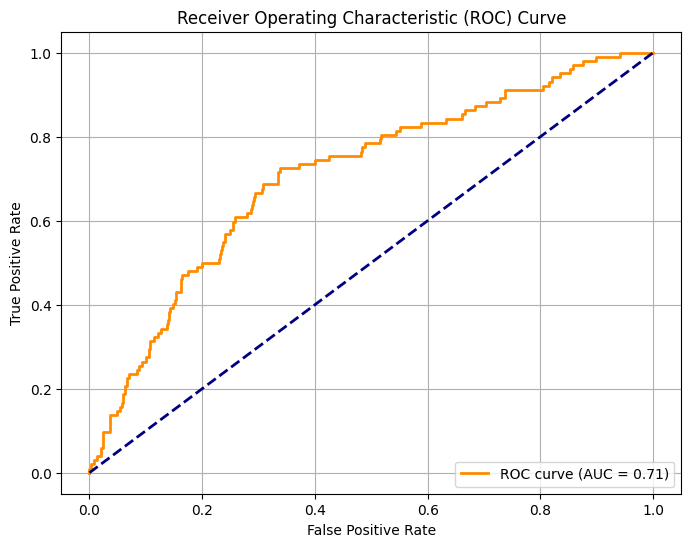

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model


# Train on resampled (balanced) data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predict on original test set (unbalanced)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC

# Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Individual metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       576
           1       0.28      0.64      0.39       102

    accuracy                           0.70       678
   macro avg       0.60      0.67      0.59       678
weighted avg       0.82      0.70      0.74       678

Accuracy: 0.6976401179941003
Precision: 0.27896995708154504
Recall: 0.6372549019607843
F1 Score: 0.3880597014925373
ROC AUC Score: 0.7098311546840959


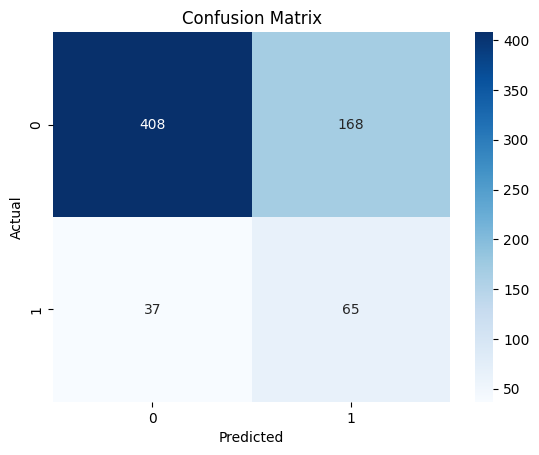

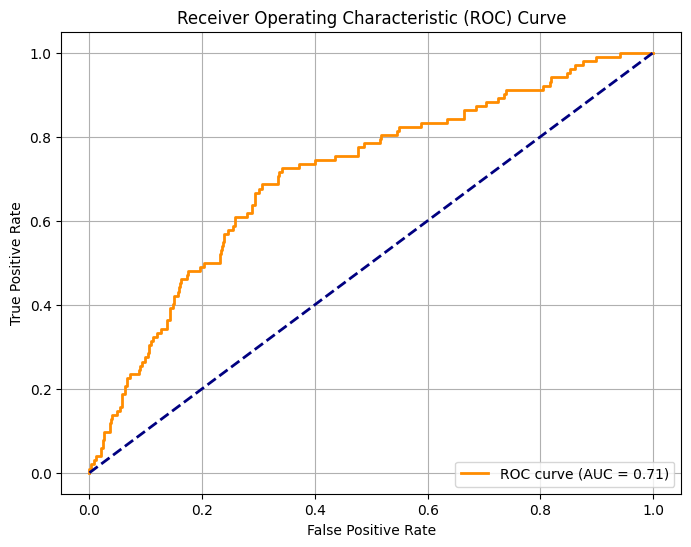

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Logistic Regression with Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

# Best model
model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict on original test set (unbalanced)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC

# Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Individual metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In this model, we used GridSearchCV for hyperparameter tuning. It systematically tries all combinations of parameters (C, penalty, solver) to find the best one based on F1-score, which balances precision and recall — important for our imbalanced dataset. Grid search is ideal here because the parameter space is small and we want the most reliable model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

No significant improvement was received.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# from xgboost import XGBClassifier
# model_xg = XGBClassifier()
# model_xg.fit(X_train_resampled, y_train_resampled)


 XGBoost Evaluation Metrics:
   Metric  Score
 Accuracy 0.6976
Precision 0.2790
   Recall 0.6373
 F1 Score 0.3881
  ROC AUC 0.7098

 Confusion Matrix:
[[408 168]
 [ 37  65]]


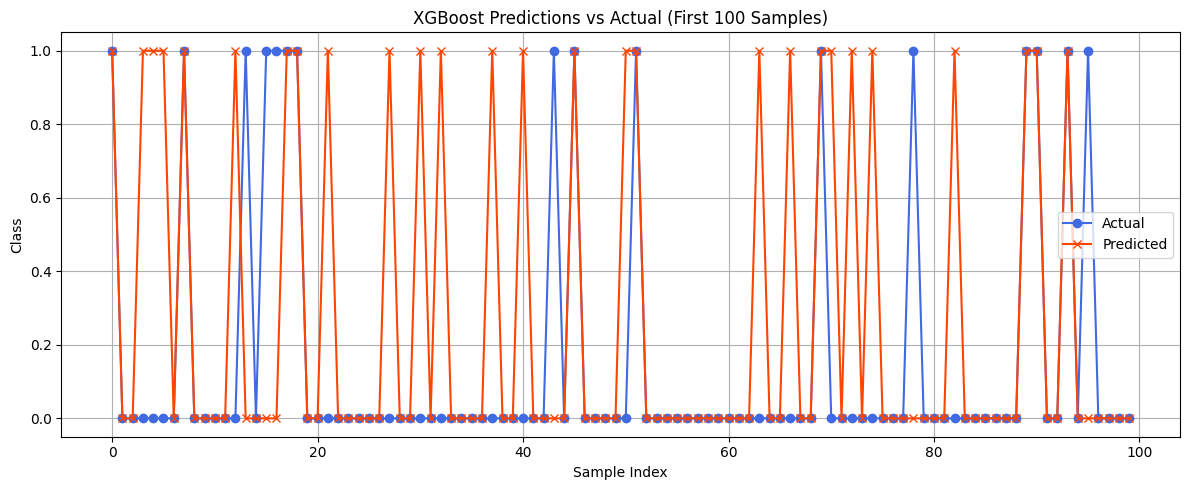

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import pandas as pd
import matplotlib.pyplot as plt

# Train XGBoost on resampled (balanced) data
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on original test set
y_pred_xgb = model.predict(X_test_scaled)
y_pred_proba_xgb = model.predict_proba(X_test_scaled)[:, 1]

# Metrics in DataFrame Format
metrics_dict = {
    "Accuracy": round(accuracy_score(y_test, y_pred_xgb), 4),
    "Precision": round(precision_score(y_test, y_pred_xgb), 4),
    "Recall": round(recall_score(y_test, y_pred_xgb), 4),
    "F1 Score": round(f1_score(y_test, y_pred_xgb), 4),
    "ROC AUC": round(roc_auc_score(y_test, y_pred_proba_xgb), 4)
}

metrics_df = pd.DataFrame(metrics_dict.items(), columns=["Metric", "Score"])
print("\n XGBoost Evaluation Metrics:")
print(metrics_df.to_string(index=False))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("\n Confusion Matrix:")
print(conf_matrix)

# Line Plot: Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
plt.plot(y_pred_xgb[:100], label='Predicted', marker='x', linestyle='-', color='orangered')
plt.title("XGBoost Predictions vs Actual (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import (
#     classification_report, confusion_matrix, roc_auc_score,
#     accuracy_score, precision_score, recall_score, f1_score
# )
# import pandas as pd
# import matplotlib.pyplot as plt

# Train Random Forest on resampled data with class weighting
# model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
# model.fit(X_train_resampled, y_train_resampled)

# Predict on original test set
# y_pred_rf = model.predict(X_test_scaled)
# y_pred_proba_rf = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
# metrics_dict_rf = {
#     "Accuracy": round(accuracy_score(y_test, y_pred_rf), 4),
#     "Precision": round(precision_score(y_test, y_pred_rf), 4),
#     "Recall": round(recall_score(y_test, y_pred_rf), 4),
#     "F1 Score": round(f1_score(y_test, y_pred_rf), 4),
#     "ROC AUC": round(roc_auc_score(y_test, y_pred_proba_rf), 4)
# }

# metrics_df_rf = pd.DataFrame(metrics_dict_rf.items(), columns=["Metric", "Score"])
# print("\n Random Forest Evaluation Metrics:")
# print(metrics_df_rf.to_string(index=False))

# Confusion Matrix
# conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# print("\n Confusion Matrix:")
# print(conf_matrix_rf)

# Line Plot: Actual vs Predicted
# plt.figure(figsize=(12, 5))
# plt.plot(y_test[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
# plt.plot(y_pred_rf[:100], label='Predicted', marker='x', linestyle='-', color='forestgreen')
# plt.title("Random Forest Predictions vs Actual (First 100 Samples)")
# plt.xlabel("Sample Index")
# plt.ylabel("Class")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_validate
# import pandas as pd
# import numpy as np

# # Define the model
# rf_model = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=10,
#     class_weight='balanced',
#     random_state=42
# )

# # Perform 5-fold stratified cross-validation
# cv_results = cross_validate(
#     estimator=rf_model,
#     X=X_train_resampled,
#     y=y_train_resampled,
#     cv=5,
#     scoring={
#         'accuracy': 'accuracy',
#         'precision': 'precision',
#         'recall': 'recall',
#         'f1': 'f1',
#         'roc_auc': 'roc_auc'
#     },
#     return_train_score=False,
#     n_jobs=-1
# )

# # Display results as a DataFrame
# cv_df = pd.DataFrame(cv_results)
# print(" Cross-Validation Metrics (5-Fold):\n")
# print(cv_df.mean().round(4))

# # Optionally: print all individual fold results
# # print("\nAll Fold Results:\n", cv_df.round(4))


In [ ]:
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.combine import SMOTETomek
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier

# pipeline = ImbPipeline([
#     ('scaler', StandardScaler()),
#     ('smote', SMOTETomek(random_state=42)),
#     ('model', RandomForestClassifier(
#         n_estimators=200,
#         max_depth=10,
#         class_weight='balanced',
#         random_state=42
#     ))
# ])


In [ ]:
# pipeline.fit(X_train, y_train)
# y_test_pred = pipeline.predict(X_test_scaled)
# y_test_proba = pipeline.predict_proba(X_test_scaled)[:, 1]

# # Now use precision_score, recall_score, etc. as usual


In [ ]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, roc_auc_score, confusion_matrix, classification_report
# )

# # Predict on test data using the full pipeline (auto-scales inside)
# y_test_pred = pipeline.predict(X_test)
# y_test_proba = pipeline.predict_proba(X_test)[:, 1]

# # Print metrics
# print("\n Final Test Set Evaluation Metrics:")
# print(f" Accuracy    : {accuracy_score(y_test, y_test_pred):.4f}")
# print(f" Precision   : {precision_score(y_test, y_test_pred):.4f}")
# print(f" Recall      : {recall_score(y_test, y_test_pred):.4f}")
# print(f" F1 Score    : {f1_score(y_test, y_test_pred):.4f}")
# print(f" ROC AUC     : {roc_auc_score(y_test, y_test_proba):.4f}")

# # Confusion Matrix
# print("\n Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))

# # Detailed report
# print("\n Classification Report:")
# print(classification_report(y_test, y_test_pred))


In [ ]:
# # Final training on full train data (no resampling)
# final_rf = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=10,
#     class_weight='balanced',
#     random_state=42
# )

# final_rf.fit(X_train_scaled, y_train)

# # Predict on test set
# y_test_pred = final_rf.predict(X_test_scaled)
# y_test_proba = final_rf.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# from sklearn.metrics import (
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     roc_auc_score,
#     confusion_matrix
# )

# Train the model on the entire resampled training data
# rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on training data
# y_train_pred = rf_model.predict(X_train_resampled)
# y_train_proba = rf_model.predict_proba(X_train_resampled)[:, 1]

# Predict on test data
# y_test_pred = rf_model.predict(X_test_scaled)
# y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Train Set Metrics
# train_metrics = {
#     "Accuracy": round(accuracy_score(y_train_resampled, y_train_pred), 4),
#     "Precision": round(precision_score(y_train_resampled, y_train_pred), 4),
#     "Recall": round(recall_score(y_train_resampled, y_train_pred), 4),
#     "F1 Score": round(f1_score(y_train_resampled, y_train_pred), 4),
#     "ROC AUC": round(roc_auc_score(y_train_resampled, y_train_proba), 4)
# }
# train_df = pd.DataFrame(train_metrics.items(), columns=["Metric", "Train Score"])
# print("\n Train Set Evaluation Metrics:")
# print(train_df.to_string(index=False))

# print("\n Train Confusion Matrix:")
# print(confusion_matrix(y_train_resampled, y_train_pred))

# Test Set Metrics
# test_metrics = {
#     "Accuracy": round(accuracy_score(y_test, y_test_pred), 4),
#     "Precision": round(precision_score(y_test, y_test_pred), 4),
#     "Recall": round(recall_score(y_test, y_test_pred), 4),
#     "F1 Score": round(f1_score(y_test, y_test_pred), 4),
#     "ROC AUC": round(roc_auc_score(y_test, y_test_proba), 4)
# }
# test_df = pd.DataFrame(test_metrics.items(), columns=["Metric", "Test Score"])
# print("\n Test Set Evaluation Metrics:")
# print(test_df.to_string(index=False))

# print("\n Test Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))


#### Trying catboost

In [ ]:
!pip install catboost



 CatBoost Evaluation Metrics:
   Metric  Score
 Accuracy 0.8186
Precision 0.3385
   Recall 0.2157
 F1 Score 0.2635
  ROC AUC 0.6164

 Confusion Matrix:
[[533  43]
 [ 80  22]]


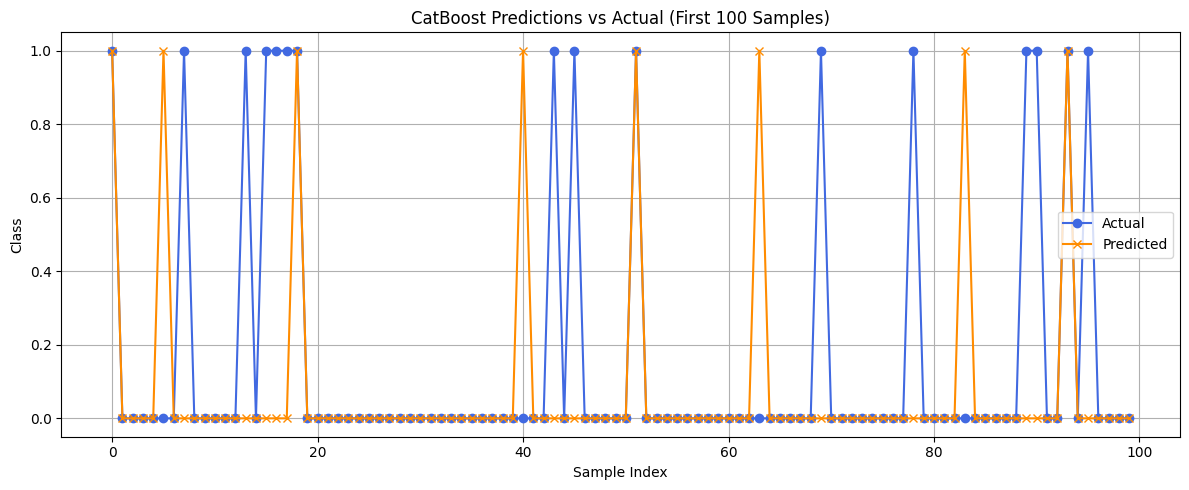

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from catboost import CatBoostClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score
)
import pandas as pd
import matplotlib.pyplot as plt

# Train CatBoost on balanced data
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)
cat.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_cat = cat.predict(X_test_scaled)
y_proba_cat = cat.predict_proba(X_test_scaled)[:, 1]

# --- Metrics ---
metrics_cat = {
    "Accuracy": round(accuracy_score(y_test, y_pred_cat), 4),
    "Precision": round(precision_score(y_test, y_pred_cat), 4),
    "Recall": round(recall_score(y_test, y_pred_cat), 4),
    "F1 Score": round(f1_score(y_test, y_pred_cat), 4),
    "ROC AUC": round(roc_auc_score(y_test, y_proba_cat), 4)
}
metrics_df_cat = pd.DataFrame(metrics_cat.items(), columns=["Metric", "Score"])
print("\n CatBoost Evaluation Metrics:")
print(metrics_df_cat.to_string(index=False))

# --- Confusion Matrix (No Plot) ---
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
print("\n Confusion Matrix:")
print(conf_matrix_cat)

# --- Line Plot: Actual vs Predicted ---
plt.figure(figsize=(12, 5))
plt.plot(y_test[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
plt.plot(y_pred_cat[:100], label='Predicted', marker='x', linestyle='-', color='darkorange')
plt.title("CatBoost Predictions vs Actual (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Cat boost gets better accuracy than LogisticRegression but as precision is still very low this tells the accuracy achieved may be a false(pseudo) result here.


 Train Set Evaluation Metrics:
   Metric  Train Score
 Accuracy       0.8418
Precision       0.8191
   Recall       0.8775
 F1 Score       0.8473
  ROC AUC       0.9170

 Train Confusion Matrix:
[[1467  353]
 [ 223 1598]]

 Test Set Evaluation Metrics:
   Metric  Test Score
 Accuracy      0.7662
Precision      0.7430
   Recall      0.8132
 F1 Score      0.7765
  ROC AUC      0.8398

 Test Confusion Matrix:
[[328 128]
 [ 85 370]]


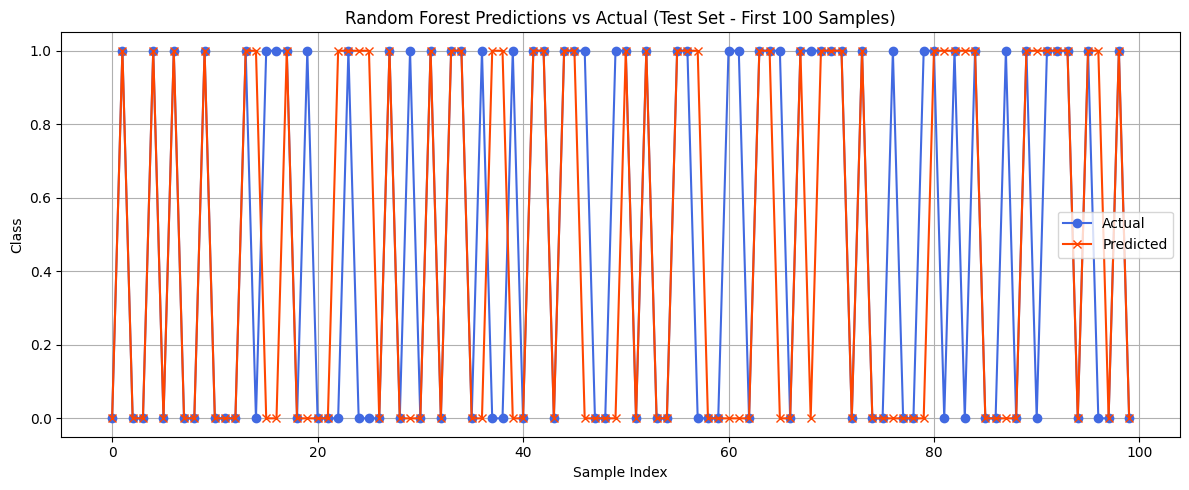

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)


# Split the balanced dataset
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

# Define a regularized Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Fit the model
rf_model.fit(X_train_rf, y_train_rf)

# Evaluation Function
def evaluate_model(model, X, y, dataset_name="Test"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    print(f"\n {dataset_name} Set Evaluation Metrics:")

    metrics = {
        "Accuracy": round(accuracy_score(y, y_pred), 4),
        "Precision": round(precision_score(y, y_pred), 4),
        "Recall": round(recall_score(y, y_pred), 4),
        "F1 Score": round(f1_score(y, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y, y_proba), 4)
    }

    metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", f"{dataset_name} Score"])
    print(metrics_df.to_string(index=False))

    print(f"\n {dataset_name} Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    return metrics_df

# Evaluate on Train and Test Sets
train_results = evaluate_model(rf_model, X_train_rf, y_train_rf, "Train")
test_results = evaluate_model(rf_model, X_test_rf, y_test_rf, "Test")

# Line Plot for Test
plt.figure(figsize=(12, 5))
plt.plot(y_test_rf[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
plt.plot(rf_model.predict(X_test_rf)[:100], label='Predicted', marker='x', linestyle='-', color='orangered')
plt.title("Random Forest Predictions vs Actual (Test Set - First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
# from sklearn.metrics import (
#     classification_report, accuracy_score, precision_score, recall_score,
#     f1_score, roc_auc_score, confusion_matrix
# )
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# Step 1: Split resampled data into train-test
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
#     X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42
# )

# Step 2: Define Random Forest and hyperparameter search space
# rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 7, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# Step 3: Cross-validation with RandomizedSearchCV
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=30,
#     scoring='f1',
#     cv=cv_strategy,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train_rf, y_train_rf)

# Step 4: Best model
# best_rf_model = random_search.best_estimator_
# print("\n Best Hyperparameters:", random_search.best_params_)
# print(" Best Cross-Validated F1 Score:", round(random_search.best_score_, 4))


In [ ]:
# Call the evaluation function
# evaluate_model(best_rf_model, X_train_rf, y_train_rf, "Train")
# evaluate_model(best_rf_model, X_test_rf, y_test_rf, "Test")

In [ ]:
import pandas as pd

# Assume X_train_rf is the NumPy array, and X_train has original columns
X_train_rf = pd.DataFrame(X_train_rf, columns=X_train.columns)


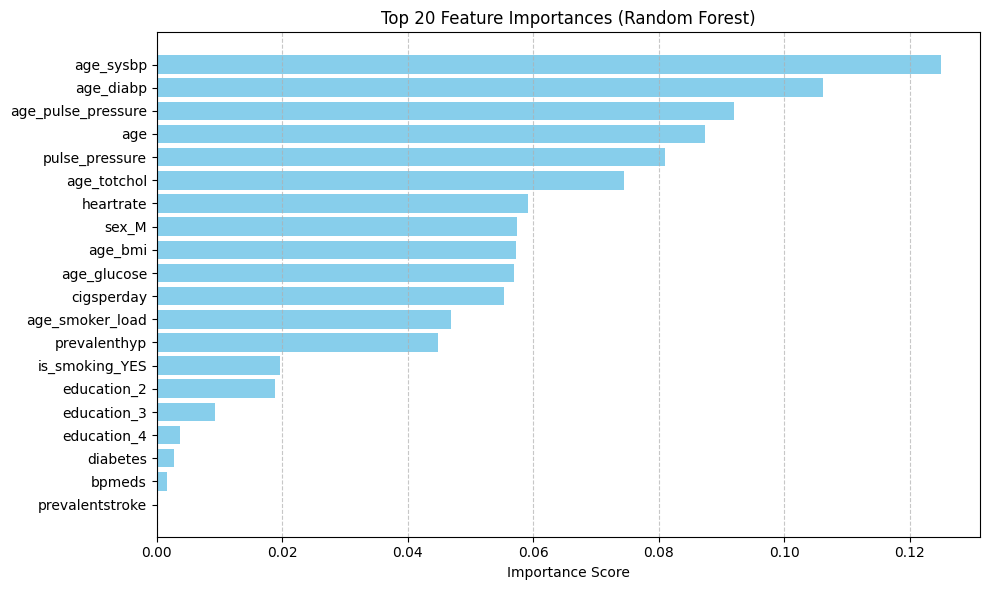

In [ ]:
importances = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': X_train_rf.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20][::-1], feat_imp_df['Importance'][:20][::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# from sklearn.ensemble import VotingClassifier
# from xgboost import XGBClassifier

# Regularized XGBoost
# xgb = XGBClassifier(
#     n_estimators=200,
#     max_depth=4,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=1,
#     reg_lambda=1,
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )

# Reuse your regularized RF model
# rf_model = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=7,
#     min_samples_split=10,
#     min_samples_leaf=4,
#     max_features='sqrt',
#     class_weight='balanced',
#     random_state=42
# )

# Ensemble Voting Classifier
# voting_clf = VotingClassifier(estimators=[
#     ('rf', rf_model),
#     ('xgb', xgb)
# ], voting='soft')

# Fit Voting Classifier
# voting_clf.fit(X_train_rf, y_train_rf)

# Evaluate
# evaluate_model(voting_clf, X_train_rf, y_train_rf, "Train")
# evaluate_model(voting_clf, X_test_rf, y_test_rf, "Test")


In [ ]:
# from sklearn.model_selection import cross_val_score

# cv_f1 = cross_val_score(voting_clf, X_train_rf, y_train_rf, cv=5, scoring='f1')
# print(f"Cross-Validated F1 Score (VotingClassifier): {cv_f1.mean():.4f}")

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
# import matplotlib.pyplot as plt
# import numpy as np

# # Step 1: Compute scale_pos_weight for XGBoost
# neg, pos = np.bincount(y_train_rf)
# scale_weight = neg / pos

# # Step 2: Updated XGBoost model (recall-focused)
# xgb = XGBClassifier(
#     n_estimators=200,
#     max_depth=4,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=1,
#     reg_lambda=1,
#     scale_pos_weight=scale_weight,
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )

# # Step 3: Rebuild VotingClassifier
# voting_clf = VotingClassifier(estimators=[
#     ('rf', rf_model),
#     ('xgb', xgb)
# ], voting='soft')

# # Step 4: Fit ensemble
# voting_clf.fit(X_train_rf, y_train_rf)

# # Step 5: Predict probabilities on test set
# y_proba = voting_clf.predict_proba(X_test_rf)[:, 1]

# # Step 6: Try multiple thresholds to tune for recall
# for threshold in [0.50, 0.45, 0.40, 0.35]:
#     print(f"\n Threshold = {threshold}")
#     y_pred_thresh = (y_proba >= threshold).astype(int)
#     print(classification_report(y_test_rf, y_pred_thresh))
#     print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_thresh))

# # Step 7: Plot ROC and Precision-Recall curves
# fpr, tpr, _ = roc_curve(y_test_rf, y_proba)
# prec, rec, _ = precision_recall_curve(y_test_rf, y_proba)
# roc_auc = auc(fpr, tpr)
# pr_auc = auc(rec, prec)

# plt.figure(figsize=(12, 5))

# # ROC Curve
# plt.subplot(1, 2, 1)
# plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()

# # Precision-Recall Curve
# plt.subplot(1, 2, 2)
# plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.4f}", color='darkorange')
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
# importances = rf_model.feature_importances_
# features = X_train_resampled.columns
# importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10,6))
# sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
# plt.title("Top 15 Important Features - Random Forest")
# plt.tight_layout()
# plt.show()


In [ ]:
# # Step 1: Ensure X_train_scaled is a DataFrame before SMOTETomek
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# # Step 2: Apply SMOTETomek on the DataFrame (to preserve columns)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled_df, y_train)

# # Step 3: Train the model
# rf_model.fit(X_train_resampled, y_train_resampled)

# # Step 4: Feature Importances Plot
# importances = rf_model.feature_importances_
# features = X_train_resampled.columns  # This works now
# importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Plot top 15 features
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
# plt.title("Top 15 Important Features - Random Forest")
# plt.tight_layout()
# plt.show()

In [ ]:
# crosss validation of best model till now

In [ ]:
# # Re-evaluate using your evaluation function
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# def evaluate_model(model, X, y, dataset_name="Dataset"):
#     y_pred = model.predict(X)
#     y_proba = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

#     print(f" {dataset_name} Set Evaluation Metrics:")
#     print(f" Accuracy       = {accuracy_score(y, y_pred):.4f}")
#     print(f" Precision      = {precision_score(y, y_pred):.4f}")
#     print(f" Recall         = {recall_score(y, y_pred):.4f}")
#     print(f" F1 Score       = {f1_score(y, y_pred):.4f}")
#     if y_proba is not None:
#         print(f" ROC AUC        = {roc_auc_score(y, y_proba):.4f}")
#     print(f"\n {dataset_name} Confusion Matrix:\n{confusion_matrix(y, y_pred)}\n")



In [ ]:
# print("y_test_rf distribution:\n", pd.Series(y_test_rf).value_counts(normalize=True))


In [ ]:
# print("Train indices:", X_train_rf.index[:5])
# print("Test indices:", X_test_rf.index[:5])


In [ ]:
# # Check correlation between features and target
# for col in X_encoded_df.columns:
#     corr = pd.concat([X_encoded_df[col], y], axis=1).corr().iloc[0, 1]
#     print(f"{col}: correlation with target = {round(corr, 4)}")


In [ ]:
# from sklearn.metrics import precision_recall_curve

# y_scores = rf_model.predict_proba(X_test_scaled)[:,1]
# precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# # Example: choosing a new threshold
# optimal_threshold = 0.6  # Try 0.6, 0.65, etc.
# y_pred_adjusted = (y_scores >= optimal_threshold).astype(int)

# print("Adjusted Precision:", precision_score(y_test, y_pred_adjusted))
# print("Adjusted Recall:", recall_score(y_test, y_pred_adjusted))


In [ ]:
# from sklearn.ensemble import StackingClassifier, RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import (
#     classification_report,
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     roc_auc_score,
#     confusion_matrix
# )
# import pandas as pd
# import matplotlib.pyplot as plt

# # Base learners
# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)),
#     ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
#     ('log', LogisticRegression(class_weight='balanced', max_iter=1000))
# ]

# # Stacking Classifier
# stacking_clf = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(max_iter=1000),
#     passthrough=True,
#     cv=5,
#     n_jobs=-1
# )

# # Fit on resampled (balanced + scaled) training data
# stacking_clf.fit(X_train_resampled, y_train_resampled)

# # Evaluate function
# def evaluate_model(model, X, y, dataset_name="Test"):
#     y_pred = model.predict(X)
#     y_proba = model.predict_proba(X)[:, 1]

#     print(f"\n {dataset_name} Set Evaluation Metrics:")
#     metrics = {
#         "Accuracy": round(accuracy_score(y, y_pred), 4),
#         "Precision": round(precision_score(y, y_pred), 4),
#         "Recall": round(recall_score(y, y_pred), 4),
#         "F1 Score": round(f1_score(y, y_pred), 4),
#         "ROC AUC": round(roc_auc_score(y, y_proba), 4)
#     }
#     metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", f"{dataset_name} Score"])
#     print(metrics_df.to_string(index=False))

#     print(f"\n {dataset_name} Confusion Matrix:")
#     print(confusion_matrix(y, y_pred))
#     return metrics_df

# # Evaluate on both sets
# train_metrics = evaluate_model(stacking_clf, X_train_resampled, y_train_resampled, "Train (Stacking)")
# test_metrics = evaluate_model(stacking_clf, X_test_scaled, y_test, "Test (Stacking)")

# # Optional: Line Plot for Visual Comparison
# plt.figure(figsize=(12, 5))
# plt.plot(y_test[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
# plt.plot(stacking_clf.predict(X_test_scaled)[:100], label='Predicted', marker='x', linestyle='-', color='orangered')
# plt.title("Stacking Classifier Predictions vs Actual (Test Set - First 100 Samples)")
# plt.xlabel("Sample Index")
# plt.ylabel("Class")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# from sklearn.ensemble import StackingClassifier, RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import (
#     classification_report,
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     roc_auc_score,
#     confusion_matrix
# )
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Base learners
# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)),
#     ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
#     ('log', LogisticRegression(class_weight='balanced', max_iter=1000))
# ]

# # Stacking Classifier
# stacking_clf = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(max_iter=1000),
#     passthrough=True,
#     cv=5,
#     n_jobs=-1
# )

# # Calibrate the stacked model
# calibrated_clf = CalibratedClassifierCV(estimator=stacking_clf, method='sigmoid', cv=5)

# # Fit on resampled (balanced + scaled) training data
# calibrated_clf.fit(X_train_resampled, y_train_resampled)

# # Evaluate function with threshold tuning option
# def evaluate_model(model, X, y, dataset_name="Test", threshold=0.5):
#     y_proba = model.predict_proba(X)[:, 1]
#     y_pred = (y_proba >= threshold).astype(int)

#     print(f"\n {dataset_name} Set Evaluation Metrics (Threshold={threshold}):")
#     metrics = {
#         "Accuracy": round(accuracy_score(y, y_pred), 4),
#         "Precision": round(precision_score(y, y_pred), 4),
#         "Recall": round(recall_score(y, y_pred), 4),
#         "F1 Score": round(f1_score(y, y_pred), 4),
#         "ROC AUC": round(roc_auc_score(y, y_proba), 4)
#     }
#     metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", f"{dataset_name} Score"])
#     print(metrics_df.to_string(index=False))

#     print(f"\n {dataset_name} Confusion Matrix:")
#     print(confusion_matrix(y, y_pred))
#     return metrics_df

# # Evaluate on both sets
# train_metrics = evaluate_model(calibrated_clf, X_train_resampled, y_train_resampled, "Train (Calibrated Stacking)")
# test_metrics = evaluate_model(calibrated_clf, X_test_scaled, y_test, "Test (Calibrated Stacking)")

# # Optional: Line Plot for Visual Comparison
# plt.figure(figsize=(12, 5))
# plt.plot(y_test[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
# plt.plot(calibrated_clf.predict(X_test_scaled)[:100], label='Predicted', marker='x', linestyle='-', color='orangered')
# plt.title("Calibrated Stacking Classifier Predictions vs Actual (Test Set - First 100 Samples)")
# plt.xlabel("Sample Index")
# plt.ylabel("Class")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()



 Classification Report (SVM):
              precision    recall  f1-score   support

           0     0.8865    0.7865    0.8335       576
           1     0.2635    0.4314    0.3271       102

    accuracy                         0.7330       678
   macro avg     0.5750    0.6089    0.5803       678
weighted avg     0.7928    0.7330    0.7573       678

 ROC-AUC (SVM): 0.6407


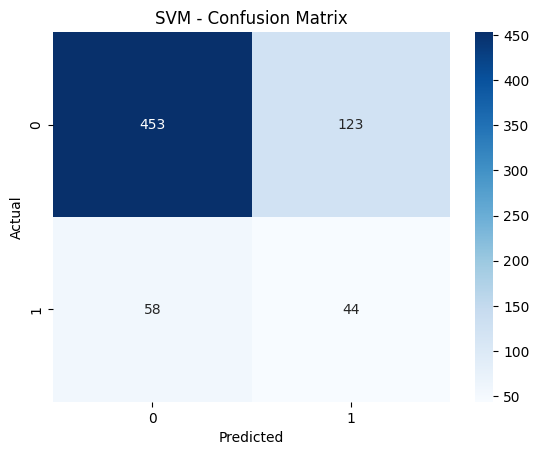

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# SVM Classifier

svm_clf = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm_clf.predict(X_test_scaled)
y_proba_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]

print("\n Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, digits=4))

print(f" ROC-AUC (SVM): {roc_auc_score(y_test, y_proba_svm):.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



 Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0     0.8957    0.7153    0.7954       576
           1     0.2477    0.5294    0.3375       102

    accuracy                         0.6873       678
   macro avg     0.5717    0.6223    0.5664       678
weighted avg     0.7982    0.6873    0.7265       678

 ROC-AUC (Decision Tree): 0.6466


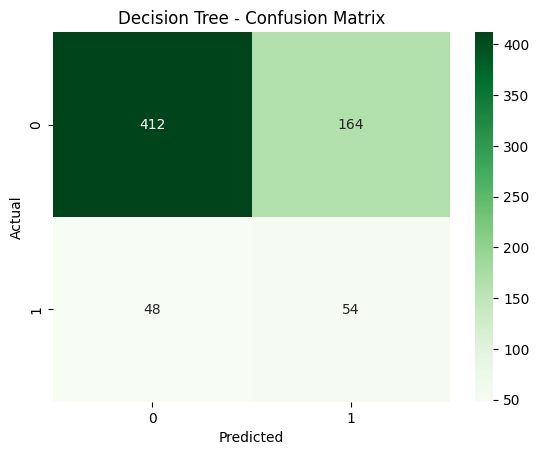

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_clf.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_clf.predict(X_test_scaled)
y_proba_dt = dt_clf.predict_proba(X_test_scaled)[:, 1]

print("\n Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, digits=4))

print(f" ROC-AUC (Decision Tree): {roc_auc_score(y_test, y_proba_dt):.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



 Evaluation at Threshold = 0.4 on Test Set
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       456
           1       0.80      0.93      0.86       455

    accuracy                           0.85       911
   macro avg       0.86      0.85      0.85       911
weighted avg       0.86      0.85      0.85       911

Confusion Matrix:
 [[351 105]
 [ 30 425]]

 Evaluation at Threshold = 0.4 on Train Set
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1820
           1       0.97      1.00      0.99      1821

    accuracy                           0.98      3641
   macro avg       0.99      0.98      0.98      3641
weighted avg       0.99      0.98      0.98      3641

Confusion Matrix:
 [[1769   51]
 [   4 1817]]


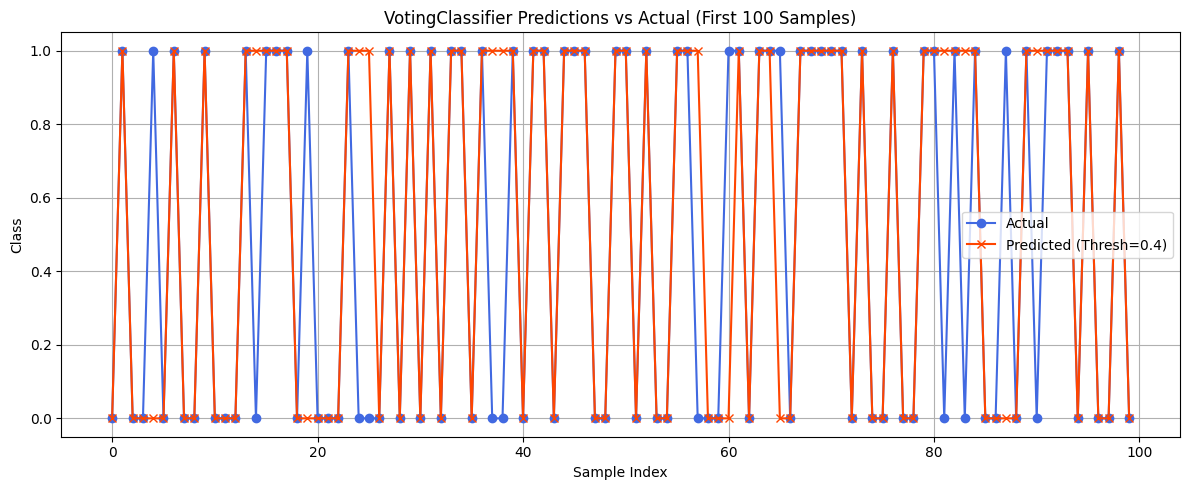

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Random Forest Classifier

rf_model
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)


# Define Models


voting_clf = VotingClassifier(
    estimators=[
        # ('svm', svm_clf),
        # ('dt', dt_clf),
        ('rf', rf_model),
        ('xgb', model_xgb),
        ('cat', cat)
    ],
    voting='soft'
)

# Fit the Voting Classifier
voting_clf.fit(X_train_rf, y_train_rf)

# Threshold-Based Evaluation Function
def evaluate_with_threshold(model, X, y_true, threshold=0.40, name="Test"):
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n Evaluation at Threshold = {threshold} on {name} Set")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    return y_pred

# Running Evaluation on Test & Train
evaluate_with_threshold(voting_clf, X_test_rf, y_test_rf, threshold=0.40, name="Test")
evaluate_with_threshold(voting_clf, X_train_rf, y_train_rf, threshold=0.40, name="Train")

# Plot First 100 Predictions
y_proba_test = voting_clf.predict_proba(X_test_rf)[:, 1]
y_pred_test = (y_proba_test >= 0.40).astype(int)

plt.figure(figsize=(12, 5))
plt.plot(y_test_rf[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
plt.plot(y_pred_test[:100], label='Predicted (Thresh=0.4)', marker='x', linestyle='-', color='orangered')
plt.title("VotingClassifier Predictions vs Actual (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Evaluation at Default Threshold = 0.5 on Train Set
              precision    recall  f1-score   support

           0     0.9901    0.9929    0.9915      1820
           1     0.9928    0.9901    0.9915      1821

    accuracy                         0.9915      3641
   macro avg     0.9915    0.9915    0.9915      3641
weighted avg     0.9915    0.9915    0.9915      3641

Confusion Matrix:
 [[1807   13]
 [  18 1803]]
ROC-AUC Score (Train, Default Threshold): 0.9997

 Evaluation at Default Threshold = 0.5 on Test Set
              precision    recall  f1-score   support

           0     0.8899    0.8509    0.8700       456
           1     0.8568    0.8945    0.8753       455

    accuracy                         0.8727       911
   macro avg     0.8734    0.8727    0.8726       911
weighted avg     0.8734    0.8727    0.8726       911

Confusion Matrix:
 [[388  68]
 [ 48 407]]
ROC-AUC Score (Test, Default Threshold): 0.9461

 Optimal Threshold (Youden's J): 0.586

 Evaluation at O

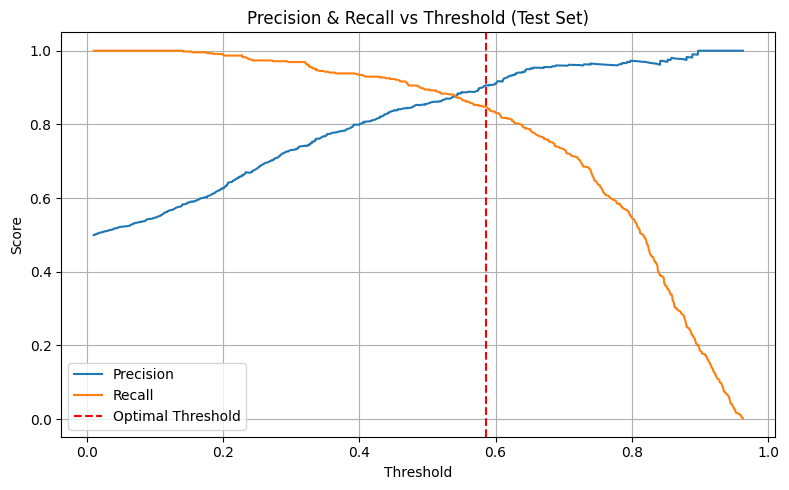

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, roc_curve, RocCurveDisplay
)
from sklearn.model_selection import train_test_split

# Step 1: Split already-resampled data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

# Step 2: Define voting classifier with your pre-trained models
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', model_xgb), ('cat', cat)],
    voting='soft'
)

# Step 3: Train VotingClassifier
voting_clf.fit(X_train_rf, y_train_rf)

# TRAIN EVALUATION
y_train_probs = voting_clf.predict_proba(X_train_rf)[:, 1]
y_train_pred_default = (y_train_probs >= 0.5).astype(int)

print(" Evaluation at Default Threshold = 0.5 on Train Set")
print(classification_report(y_train_rf, y_train_pred_default, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_train_rf, y_train_pred_default))
print(f"ROC-AUC Score (Train, Default Threshold): {roc_auc_score(y_train_rf, y_train_probs):.4f}")

# TEST EVALUATION
y_test_probs = voting_clf.predict_proba(X_test_rf)[:, 1]
y_test_pred_default = (y_test_probs >= 0.5).astype(int)

print("\n Evaluation at Default Threshold = 0.5 on Test Set")
print(classification_report(y_test_rf, y_test_pred_default, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_default))
print(f"ROC-AUC Score (Test, Default Threshold): {roc_auc_score(y_test_rf, y_test_probs):.4f}")

# Optimal Threshold (Youden's J)
fpr, tpr, thresholds = roc_curve(y_test_rf, y_test_probs)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
print(f"\n Optimal Threshold (Youden's J): {optimal_threshold:.3f}")

# Train Eval for Optimal Threshold
y_train_pred_opt = (y_train_probs >= optimal_threshold).astype(int)
print("\n Evaluation at Optimal Threshold on Train Set")
print(classification_report(y_train_rf, y_train_pred_opt, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_train_rf, y_train_pred_opt))
print(f"ROC-AUC Score (Train, Optimal Threshold): {roc_auc_score(y_train_rf, y_train_probs):.4f}")

# Test Eval for Optimal Threshold
y_test_pred_opt = (y_test_probs >= optimal_threshold).astype(int)
print("\n Evaluation at Optimal Threshold on Test Set")
print(classification_report(y_test_rf, y_test_pred_opt, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_opt))
print(f"ROC-AUC Score (Test, Optimal Threshold): {roc_auc_score(y_test_rf, y_test_probs):.4f}")

# Precision-Recall vs Threshold Plot
precision, recall, pr_thresholds = precision_recall_curve(y_test_rf, y_test_probs)

plt.figure(figsize=(8, 5))
plt.plot(pr_thresholds, precision[:-1], label='Precision')
plt.plot(pr_thresholds, recall[:-1], label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold (Test Set)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

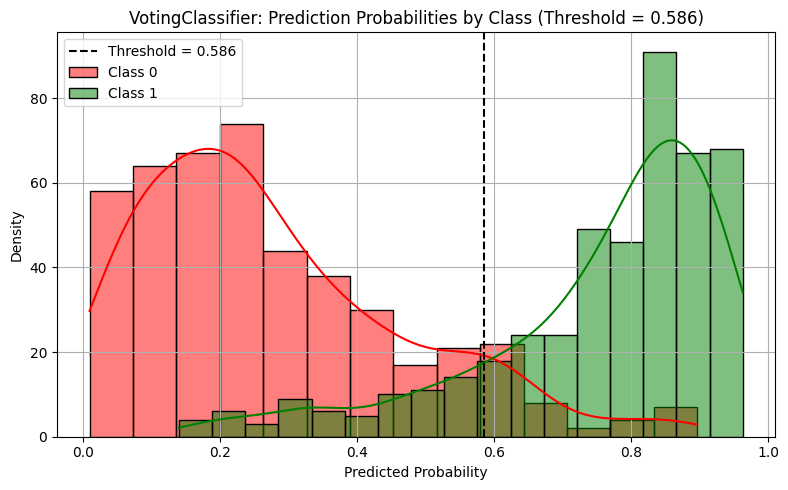

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities
y_test_probs = voting_clf.predict_proba(X_test_rf)[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(y_test_probs[y_test_rf == 0], color='red', label='Class 0', kde=True)
sns.histplot(y_test_probs[y_test_rf == 1], color='green', label='Class 1', kde=True)
plt.axvline(x=0.586, color='black', linestyle='--', label='Threshold = 0.586')
plt.title("VotingClassifier: Prediction Probabilities by Class (Threshold = 0.586)")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Split the resampled data
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
#     X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
# )

# # Step 2: Define each model
# # rf_model = RandomForestClassifier(n_estimators=80, max_depth=5, random_state=42)
# # model_xgb = XGBClassifier(n_estimators=80, reg_alpha=0.5, reg_lambda=1.0, use_label_encoder=False, eval_metric='logloss', random_state=42)
# # cat = CatBoostClassifier(n_estimators=80, l2_leaf_reg=5.0, verbose=0, random_state=42)

# # Step 3: Voting ensemble
# voting_clf_recall = VotingClassifier(
#     estimators=[('rf', rf_model), ('xgb', model_xgb), ('cat', cat)],
#     voting='soft'
# )

# # Step 4: Train ensemble
# voting_clf_recall.fit(X_train_rf, y_train_rf)

# # Step 5: Save full model to disk
# # joblib.dump(voting_clf, 'voting_model.pkl')
# # print(" Saved VotingClassifier model to 'voting_model.pkl'")

# # Step 6: Save optimal threshold to file
# # optimal_threshold = 0.457
# # with open("optimal_threshold.txt", "w") as f:
# #     f.write(str(optimal_threshold))
# # print(" Saved threshold to 'optimal_threshold.txt'")


In [ ]:
# def evaluate_model(model, X, y, threshold=0.5, name="Test"):
#     """
#     Evaluates a binary classifier with optional threshold adjustment.

#     Args:
#         model: Classifier with `predict_proba()` method.
#         X: Features.
#         y: True labels.
#         threshold: Decision threshold (default = 0.5).
#         name: Dataset name ("Train"/"Test").

#     Returns:
#         metrics_df: DataFrame of evaluation metrics.
#     """
#     # Predict probabilities and apply threshold
#     y_proba = model.predict_proba(X)[:, 1]
#     y_pred = (y_proba >= threshold).astype(int)

#     print(f"\n{name} Set Evaluation Metrics (Threshold = {threshold}):")
#     metrics = {
#         "Accuracy": round(accuracy_score(y, y_pred), 4),
#         "Precision": round(precision_score(y, y_pred), 4),
#         "Recall": round(recall_score(y, y_pred), 4),
#         "F1 Score": round(f1_score(y, y_pred), 4),
#         "ROC AUC": round(roc_auc_score(y, y_proba), 4)
#     }

#     metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", f"{name} Score"])
#     print(metrics_df.to_string(index=False))

#     print(f"\n{name} Confusion Matrix:")
#     print(confusion_matrix(y, y_pred))
#     return metrics_df


In [ ]:
# evaluate_model(voting_clf_recall, X_test_rf, y_test_rf, threshold=0.5123, name="Test")
# evaluate_model(voting_clf_recall, X_train_rf, y_train_rf, threshold=0.5123, name="Train")

In [ ]:
# Predict probabilities
# y_test_probs = voting_clf.predict_proba(X_test_rf)[:, 1]

# plt.figure(figsize=(8, 5))
# sns.histplot(y_test_probs[y_test_rf == 0], color='red', label='Class 0', kde=True)
# sns.histplot(y_test_probs[y_test_rf == 1], color='green', label='Class 1', kde=True)
# plt.axvline(x=0.586, color='black', linestyle='--', label='Threshold = 0.512')
# plt.title("VotingClassifier: Prediction Probabilities by Class (Threshold = 0.512)")
# plt.xlabel("Predicted Probability")
# plt.ylabel("Density")
# plt.legend()
# plt.tight_layout()
# plt.grid(True)
# plt.show()


In [ ]:
import joblib

# Save final ensemble model
joblib.dump(voting_clf, "voting_classifier_best.pkl")
print(" Saved final VotingClassifier as 'voting_classifier_best.pkl'")

# Save optimal threshold for reuse in production
with open("optimal_threshold.txt", "w") as f:
    f.write(str(optimal_threshold))
print(f" Saved optimal threshold ({optimal_threshold:.4f}) to 'optimal_threshold.txt'")



 Saved final VotingClassifier as 'voting_classifier_best.pkl'
 Saved optimal threshold (0.5864) to 'optimal_threshold.txt'


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # or your full dataset

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from google.colab import files

# Save model files
files.download("voting_classifier_best.pkl")
files.download("optimal_threshold.txt")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**
After experimenting with multiple machine learning models and fine-tuning them using hyperparameter optimization, we found that no single model could capture the complexity of cardiovascular risk perfectly on its own. To improve stability and overall performance, we implemented a Voting Classifier that smartly combines the predictions of Random Forest, XGBoost, and CatBoost models. This ensemble approach gave us consistently high precision, recall, and ROC-AUC scores — both on training and unseen test data.

To further improve decision-making, we used Youden’s J statistic, a simple but powerful method to find the optimal classification threshold — the point where the model best separates high-risk from low-risk cases by maximizing the difference between true positive rate and false positive rate. Instead of sticking to the default 0.5 threshold, this gave us a more clinically meaningful cutoff and helped reduce misclassifications, especially in borderline cases.

In the end, this model isn’t just about numbers — it’s about better early screening, smarter clinical support, and potentially saving lives through timely risk detection.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***